<a href="https://colab.research.google.com/github/aarshroongta1/indian-food-instance-segmentation/blob/main/NeuroEquilbrium_Food_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ABOUT

For the purpose of this project, I am developing an **instance segmentation** model that can detect multiple Indian food dishes in a plate through a single image.

#DATASET
A custom dataset was prepared by scraping images of the most common Indian food items using **DuckDuckGo Image Search API**.

The images were then annotated using **Roboflow**, a comprehensive platform that allows developers to easily create and pre-process custom datasets and also build and deploy computer vision models.

Link to dataset: https://universe.roboflow.com/internship-cjnh4/neuroequilibrium-internship/dataset/2

#YOLOv8

## Setup
Model used: Ultralytics YOLOv8
The  package comes with a command-line interface (CLI) that simplifies training, validation, and inference tasks.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.8/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Importing Dataset

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="i15x1wBp5OumtaOLinY7")
project = rf.workspace("internship-cjnh4").project("neuroequilibrium-internship")
dataset = project.version(2).download("yolov8")


mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to NeuroEquilibrium-Internship-2 in yolov8:: 100%|██████████| 1194/1194 [00:00<00:00, 4843.51it/s]


##Training
A YOLOv8m (medium) model is trained with 100 epochs.

In [7]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8m-seg.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

/content
100% 52.4M/52.4M [00:01<00:00, 53.3MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/datasets/NeuroEquilibrium-Internship-2/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, ker

##Performance

In [8]:
!ls {HOME}/runs/segment/train/

args.yaml					    MaskP_curve.png	 train_batch2791.jpg
BoxF1_curve.png					    MaskPR_curve.png	 train_batch2792.jpg
BoxP_curve.png					    MaskR_curve.png	 train_batch2.jpg
BoxPR_curve.png					    results.csv		 val_batch0_labels.jpg
BoxR_curve.png					    results.png		 val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg	 weights
events.out.tfevents.1697306314.1f5555ee38d0.3337.0  train_batch1.jpg
MaskF1_curve.png				    train_batch2790.jpg


Confusion Matrix (background class to be ignored)

/content


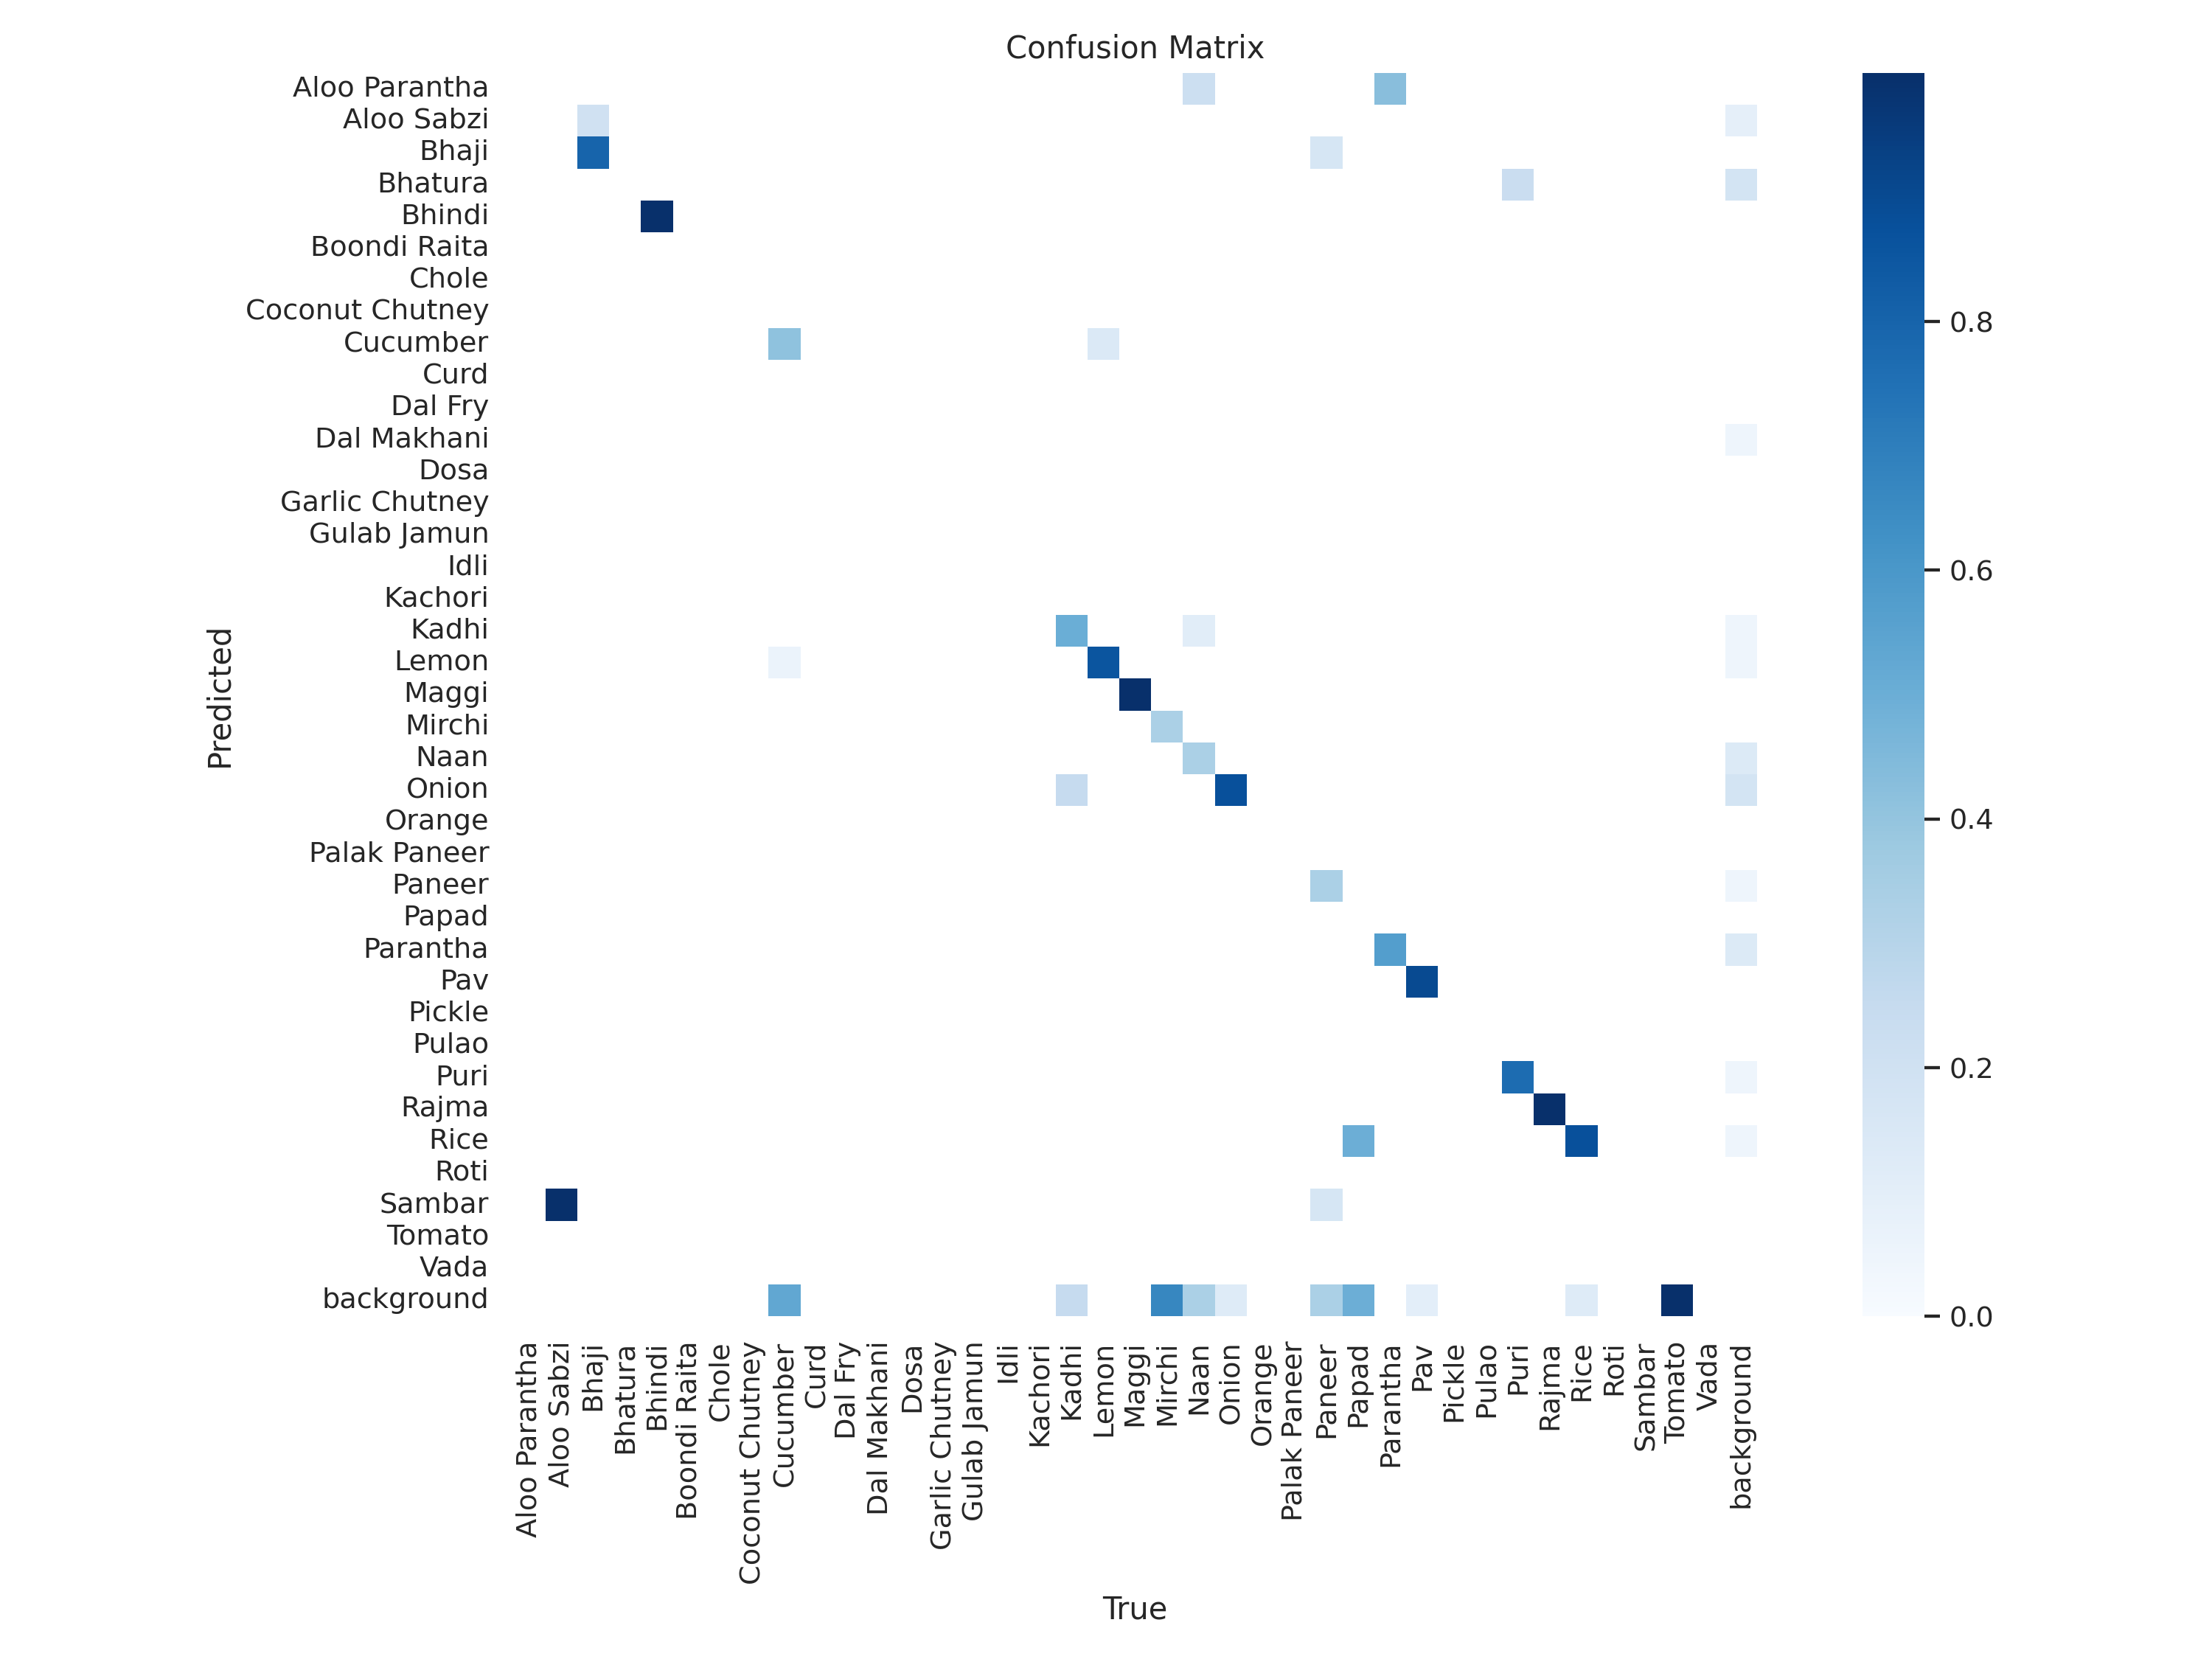

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=1000)

Train Metrics Visualization

/content


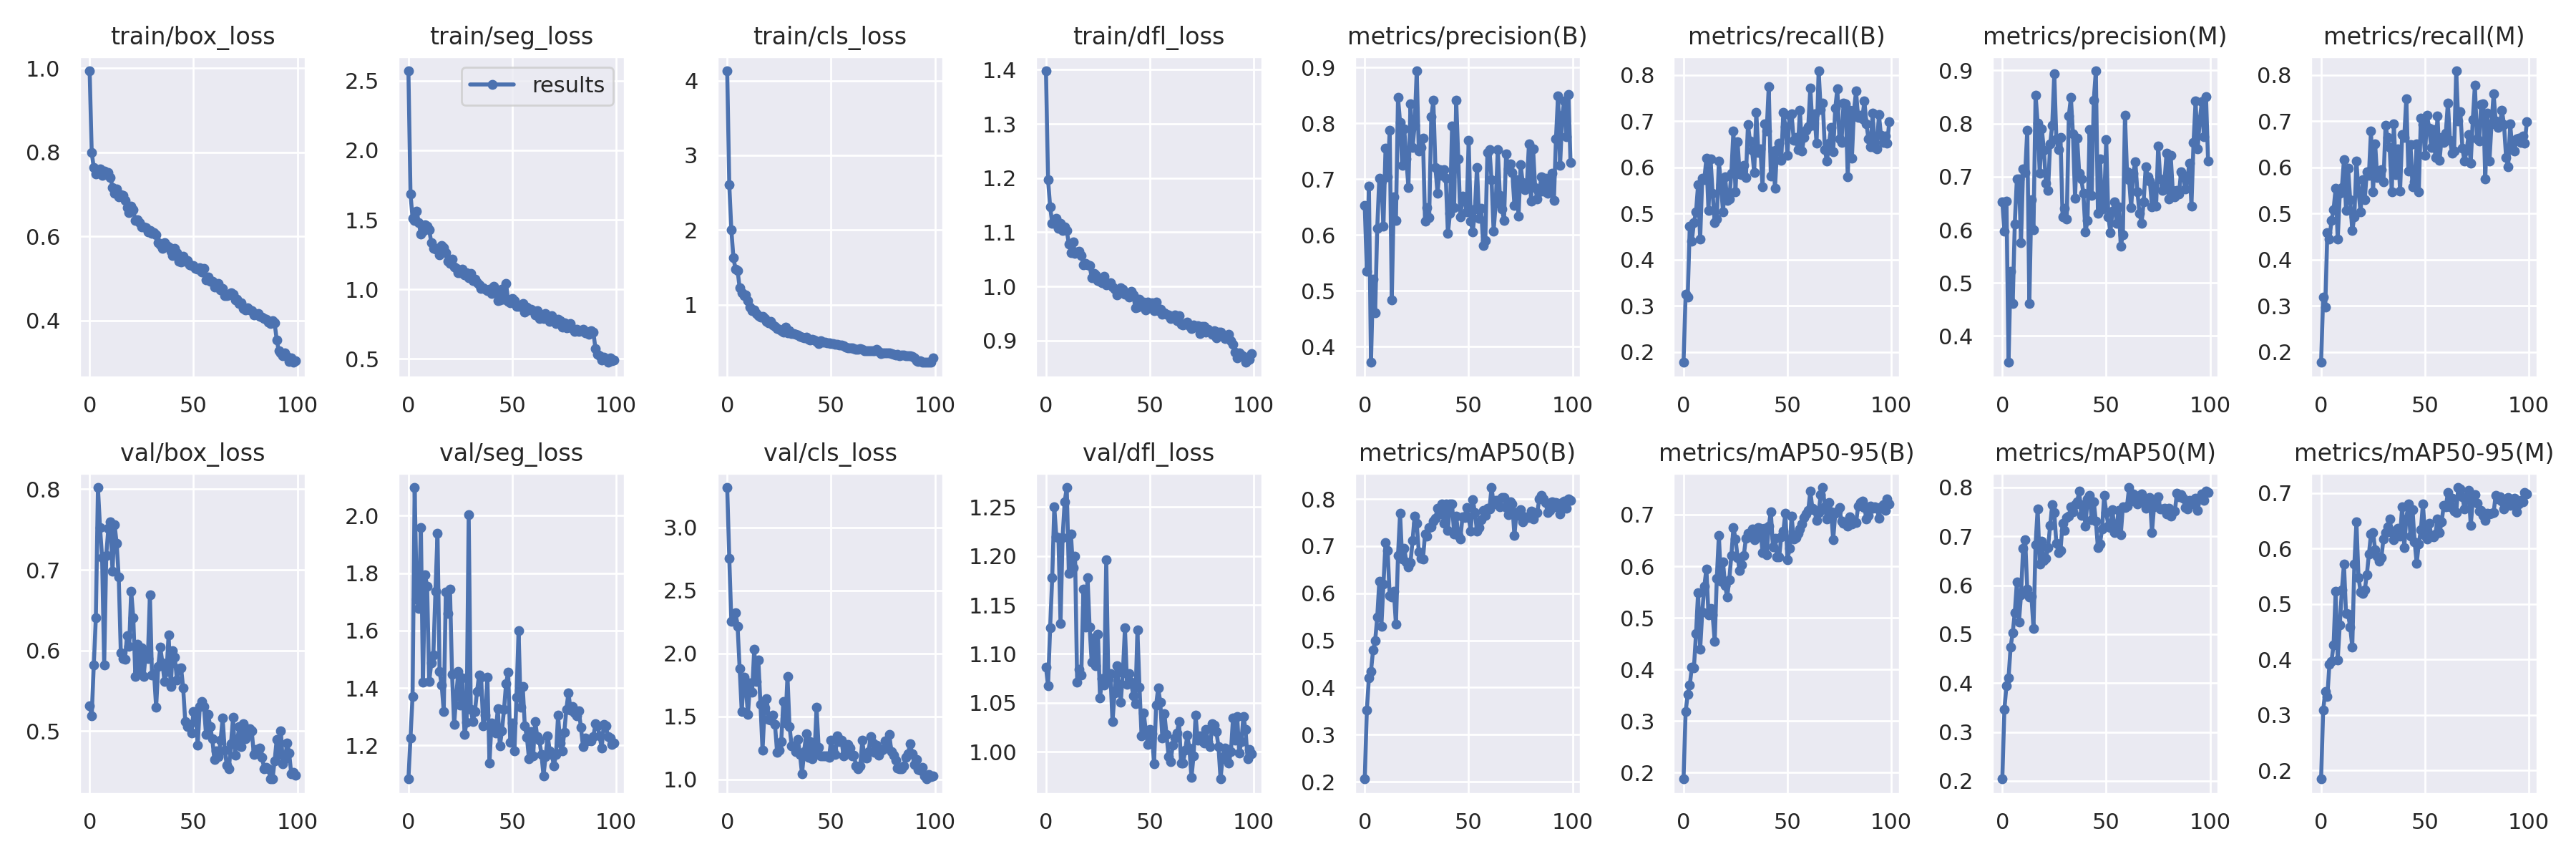

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=1000)

Sample

/content


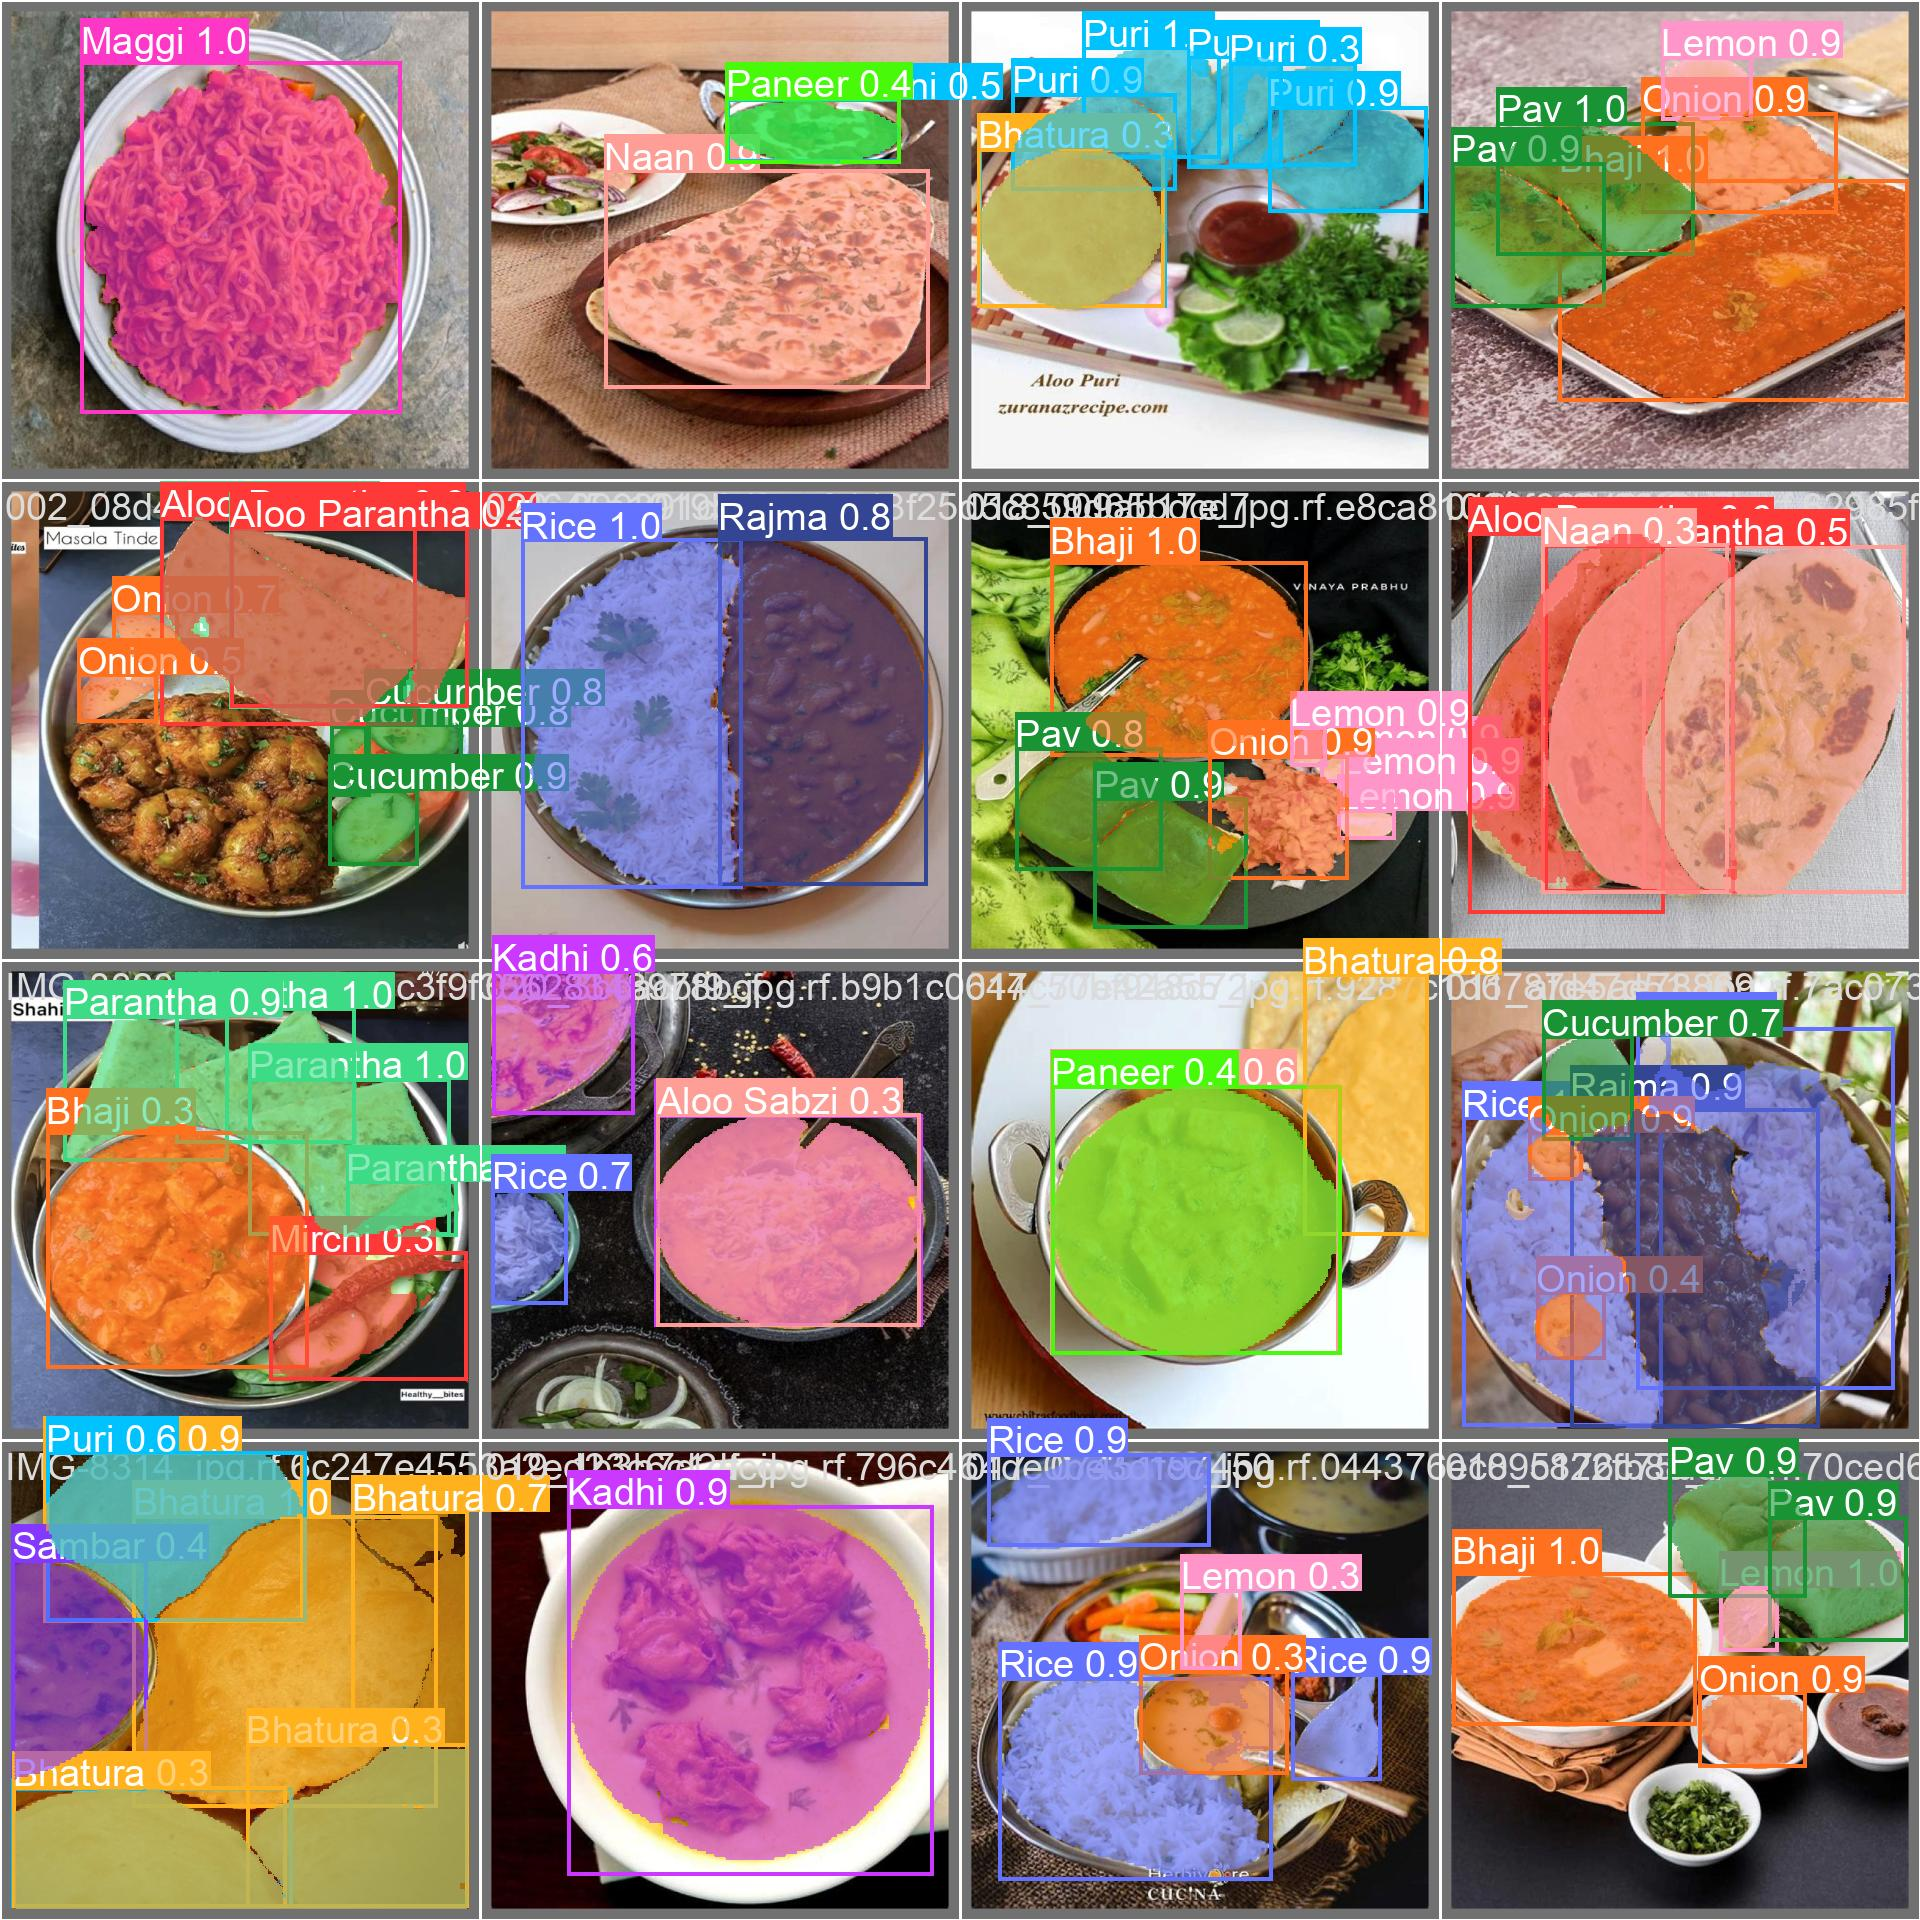

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=1000)

## Validation
The best weights gained during training are used applied to new validation data to judge if any hyperparameter must be fine-tuned.

In [12]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-10-14 19:04:45.995323: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-14 19:04:46.895143: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27244386 parameters, 0 gradients, 110.1 GFLOPs
val: Scanning /content/datasets/NeuroEquilibrium-Internship-2/valid/labels.cache... 26 images, 0 backgrounds, 0 corrupt: 100% 26/26 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.17s/it]
                   all         26        108      0.626

#Detectron2

## Setup
Model used: Detectron2 (a framework built by Facebook AI Research that includes implementation for state-of-the-art object detection models namely Fast R-CNN, Faster R-CNN, Mask R-CNN, etc.)

In [21]:
import sys, distutils.core

In [ ]:
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

In [23]:
import logging
import torch
from collections import OrderedDict
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import json, cv2, random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.utils.visualizer import ColorMode
from detectron2.solver import build_lr_scheduler, build_optimizer
from detectron2.checkpoint import DetectionCheckpointer, PeriodicCheckpointer
from detectron2.utils.events import EventStorage
from detectron2.modeling import build_model
import detectron2.utils.comm as comm
from detectron2.engine import default_argument_parser, default_setup, default_writers, launch
from detectron2.data import (
    MetadataCatalog,
    build_detection_test_loader,
    build_detection_train_loader,
)
from detectron2.evaluation import (
    CityscapesInstanceEvaluator,
    CityscapesSemSegEvaluator,
    COCOEvaluator,
    COCOPanopticEvaluator,
    DatasetEvaluators,
    LVISEvaluator,
    PascalVOCDetectionEvaluator,
    SemSegEvaluator,
    inference_on_dataset,
    print_csv_format,
)

from roboflow import Roboflow

from matplotlib import pyplot as plt
from PIL import Image

## Importing dataset

In [24]:
rf = Roboflow(api_key="i15x1wBp5OumtaOLinY7")
project = rf.workspace("internship-cjnh4").project("neuroequilibrium-internship")
dataset = project.version(2).download("coco")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to NeuroEquilibrium-Internship-2 in coco:: 100%|██████████| 599/599 [00:00<00:00, 2264.99it/s]


In [25]:
register_coco_instances("demo_train", {}, f"/content/NeuroEquilibrium-Internship-2/train/_annotations.coco.json", f"/content/NeuroEquilibrium-Internship-2/train/")
register_coco_instances("demo_valid", {}, f"/content/NeuroEquilibrium-Internship-2/valid/_annotations.coco.json", f"/content/NeuroEquilibrium-Internship-2/valid/")
register_coco_instances("demo_test", {}, f"/content/NeuroEquilibrium-Internship-2/test/_annotations.coco.json", f"/content/NeuroEquilibrium-Internship-2/test/")

WARNING [10/14 19:26:35 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[10/14 19:26:35 d2.data.datasets.coco]: Loaded 483 images in COCO format from /content/NeuroEquilibrium-Internship-2/train/_annotations.coco.json


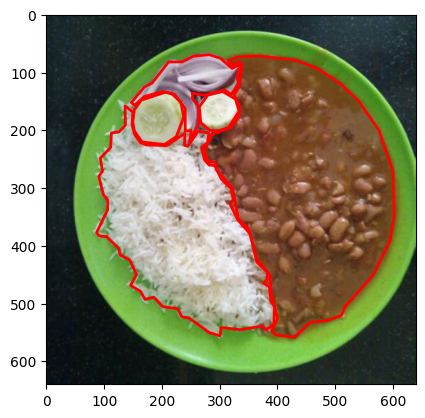

In [29]:
dataset_train = DatasetCatalog.get("demo_train")

#sample
fig, ax = plt.subplots()
dataset_dict = random.choice(dataset_train)
im = Image.open(dataset_dict['file_name'])
ax.imshow(im)
for ann in dataset_dict['annotations']:
    for poly in ann['segmentation']:
        x = poly[0::2]
        y = poly[1::2]
        ax.plot(x,y, linewidth=2, color='red')


##Training

Write a custom training configuration

In [30]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")) #using mask r-cnn model for segmentation
cfg.DATASETS.TRAIN = ("demo_train",)
cfg.DATASETS.TEST = ("demo_test",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Initialize training from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1500
cfg.SOLVER.STEPS = []
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 40
cfg.TEST.EVAL_PERIOD = 0

PATIENCE = 50 #Early stopping will occur after 50 iterations of no imporovement in total_loss

Create a customer trainer to ensure the model is validated against the validation data provided.

In [31]:


from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

Train using the custom trainer

In [32]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[10/14 19:29:39 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:01, 143MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[10/14 19:29:41 d2.engine.train_loop]: Starting training from iteration 0


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)


[10/14 19:29:56 d2.utils.events]:  eta: 0:08:51  iter: 19  total_loss: 5.129  loss_cls: 3.669  loss_box_reg: 0.6339  loss_mask: 0.6927  loss_rpn_cls: 0.05477  loss_rpn_loc: 0.02357    time: 0.3660  last_time: 0.3709  data_time: 0.0188  last_data_time: 0.0074   lr: 4.9953e-06  max_mem: 1816M
[10/14 19:30:08 d2.utils.events]:  eta: 0:08:42  iter: 39  total_loss: 5.08  loss_cls: 3.525  loss_box_reg: 0.7338  loss_mask: 0.6931  loss_rpn_cls: 0.08125  loss_rpn_loc: 0.02501    time: 0.4375  last_time: 0.4041  data_time: 0.0101  last_data_time: 0.0060   lr: 9.9902e-06  max_mem: 1816M
[10/14 19:30:15 d2.utils.events]:  eta: 0:08:33  iter: 59  total_loss: 4.519  loss_cls: 3.153  loss_box_reg: 0.5446  loss_mask: 0.6916  loss_rpn_cls: 0.0643  loss_rpn_loc: 0.02565    time: 0.4076  last_time: 0.3739  data_time: 0.0109  last_data_time: 0.0202   lr: 1.4985e-05  max_mem: 1817M
[10/14 19:30:23 d2.utils.events]:  eta: 0:08:27  iter: 79  total_loss: 4.169  loss_cls: 2.649  loss_box_reg: 0.7027  loss_mask

##Validation

In [46]:
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("demo_test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "demo_test")
inference_on_dataset(trainer.model, val_loader, evaluator)

[10/14 21:11:06 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...
[10/14 21:11:07 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [10/14 21:11:07 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [10/14 21:11:07 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[10/14 21:11:07 d2.data.datasets.coco]: Loaded 82 images in COCO format from /content/NeuroEquilibrium-Internship-2/test/_annotations.coco.json
[10/14 21:11:07 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/14 21:11:07 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/14 21:11:07 d2.

OrderedDict([('bbox',
              {'AP': 23.900834038879523,
               'AP50': 34.75660849411869,
               'AP75': 27.52964286671485,
               'APs': 0.0,
               'APm': 12.438437036567592,
               'APl': 24.846627271645442,
               'AP-Food': nan,
               'AP-Aloo Parantha': 30.198677929236123,
               'AP-Aloo Sabzi': 33.4077407740774,
               'AP-Bhaji': 75.04950495049505,
               'AP-Bhatura': 31.34998796420373,
               'AP-Bhindi': 0.0,
               'AP-Boondi Raita': 0.0,
               'AP-Chole': 38.962508434405876,
               'AP-Coconut Chutney': 1.7347028053522437,
               'AP-Cucumber': 17.13669758682299,
               'AP-Curd': 17.69329432943294,
               'AP-Dal Fry': 0.0,
               'AP-Dal Makhani': 0.0,
               'AP-Dosa': 59.74422442244224,
               'AP-Garlic Chutney': 5.384615384615383,
               'AP-Gulab Jamun': 57.05179151490477,
               'AP

#RESULT

The mAP-50 (mean Average Precision at an IoU threshold of 0.5) obtained for YOLOv8 and Detectron 2 are approximately 80% and 35%, respectively.

Hence, this proof of concept has helped decide that a YOLOv8 model to use for a similar project to be conducted using a much larger and diverse dataset.

#TESTING THE YOLOv8 MODEL
Assess the fully trained model's performance on completely unseen data.

In [ ]:
#predict instances in the test data and save the resulting images with bounding boxes and masks.

%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
2023-10-14 19:05:58.361807: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-14 19:05:59.290453: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27244386 parameters, 0 gradients, 110.1 GFLOPs

image 1/82 /content/datasets/NeuroEquilibrium-Internship-2/test/images/001_20347dad_jpg.rf.5f29904c3e09cef73471a762eadadbfb.jpg: 640x640 6 Idlis, 1 Sambar, 45.9ms
image 2/82 /content/datasets/NeuroEquilibrium-Internship-2/test/images/001_4fb73616_jpg.rf.11d06bc12afad22b04165f3cea15fed4.jpg: 640x640 1 Aloo Sabzi, 1 Dosa, 45.9ms
image 3/82 /content/datasets/NeuroEquilibr

Example predictions

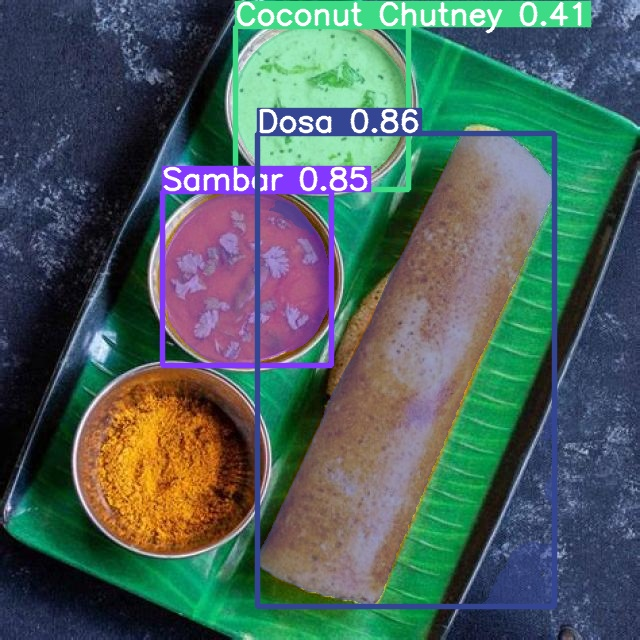

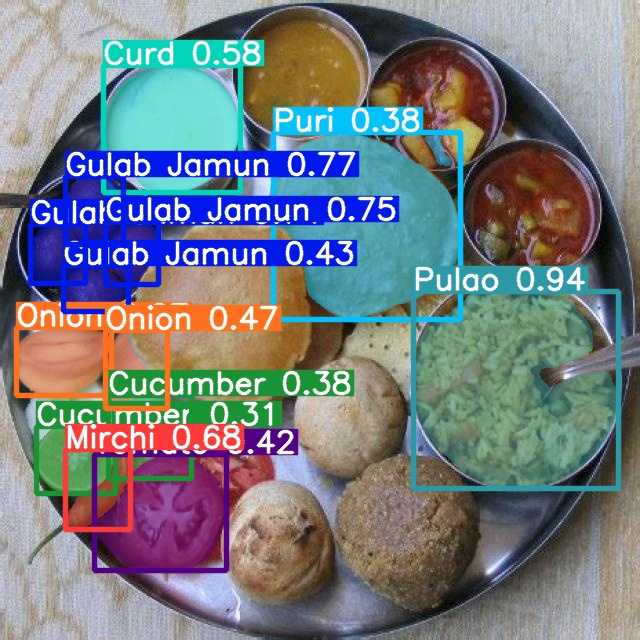

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[2:4]:
      display(Image(filename=image_path, height=600))
      print("\n")